In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import numpy as np

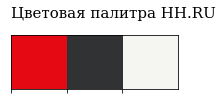

In [16]:
sns.palplot([ '#e50914','#303233','#f5f5f1'])

plt.title("Цветовая палитра HH.RU",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [17]:
df = pd.read_csv("de.csv")

In [18]:
df.shape

(2528, 15)

In [19]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1


In [20]:
print(df.isnull().sum())
print(df.info())

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Ty

In [21]:
Salary = df['Salary Estimate'].str.split('-', expand=True)
Min = Salary[0].str.replace('$', '').str.replace('K', '')
Max = Salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')
df['Min Salary'] = Min
df['Max Salary'] = Max
df.drop('Salary Estimate', axis=1, inplace=True )

/tmp/ipykernel_59/828378500.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Min = Salary[0].str.replace('$', '').str.replace('K', '')
/tmp/ipykernel_59/828378500.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Max = Salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')
/tmp/ipykernel_59/828378500.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Max = Salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')


In [23]:
df['Job Title'] = df['Job Title'].str.replace('Sr.', 'Senior')

/tmp/ipykernel_59/2411322731.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title'] = df['Job Title'].str.replace('Sr.', 'Senior')


In [25]:
df['Job Title'].value_counts()

Data Engineer                                          469
Senior Data Engineer                                   138
Software Engineer                                       93
Big Data Engineer                                       73
Machine Learning Engineer                               17
                                                      ... 
Senior Data Engineer (AWS)                               1
Data Center Hardware Engineer I                          1
Tier II TAC Engineer                                     1
IT Support Engineer I                                    1
Future Opportunities: Software Development Engineer      1
Name: Job Title, Length: 1252, dtype: int64

### Построить график компаний с самым большим кол-вом вакансий

In [50]:
data = df.groupby('Company Name').count()["Size"].sort_values(ascending=False)[:10]


Text(0.09, 1, 'Топ 10  компаний с числом вакансий')

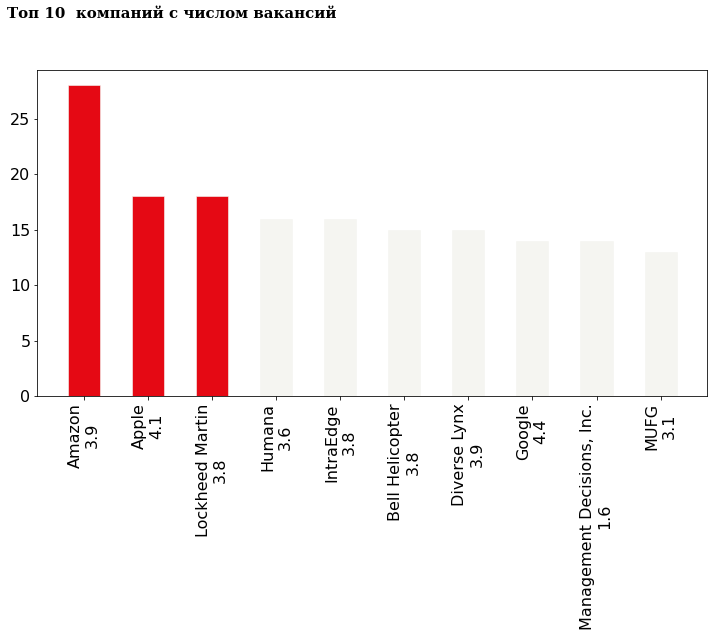

In [52]:

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e50914' 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt.tick_params(axis='both', which='major', labelsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.bar(data.index, data, width=0.5, 
       edgecolor='#f5f5f1',
       linewidth=0.6,color=color_map)
fig.text(0.09, 1, 'Топ 10  компаний с числом вакансий', fontsize=15, fontweight='bold', fontfamily='serif')




### Построить график самых популярный названий в вакансиях

In [53]:
job_count = df['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='Counts')

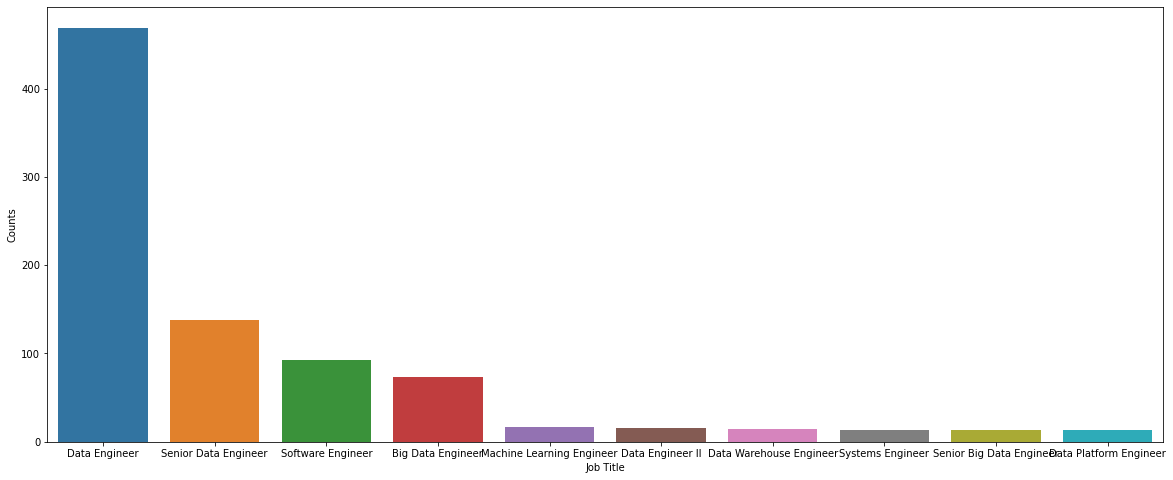

In [54]:

plt.show()
plt.figure(figsize=(20,8))
sns.barplot(x='Job Title', y='Counts', data=job_count.head(10))
plt.show()


### Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [55]:
data = df.groupby('Location').count()["Size"].sort_values(ascending=False)[:10]

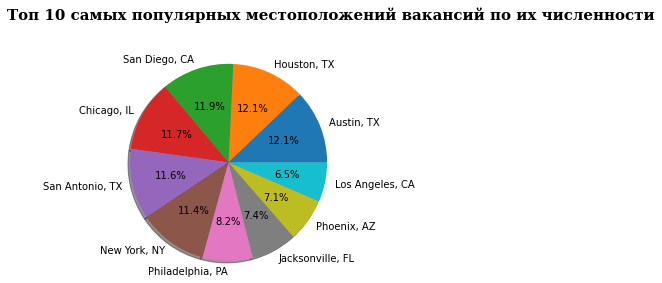

In [56]:
fig, ax = plt.subplots()

ax.pie(data, labels=data.index, autopct='%1.1f%%', shadow=True) 
ax.axis("equal")
fig.text(0.001, 1, 'Топ 10 самых популярных местоположений вакансий по их численности', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

### Построить график популярности по колонке Type of ownership, относительно численности вакансий


In [57]:
data = df.groupby(['Job Title', 'Type of ownership']).count()["Size"].sort_values(ascending=False)[:10]

In [59]:
jobs = df['Job Title'].value_counts()[:11].index
data_q2q3 = df[['Job Title', 'Type of ownership']].groupby('Job Title')['Type of ownership'].value_counts().unstack().loc[jobs]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Company - Private', 'Company - Public']].sort_values(by='Company - Private',ascending=False)[::-1]


/tmp/ipykernel_59/4090063461.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


Text(0.13, 0.93, 'Uрафик популярности по колонке Type of ownership, относительно численности вакансий')

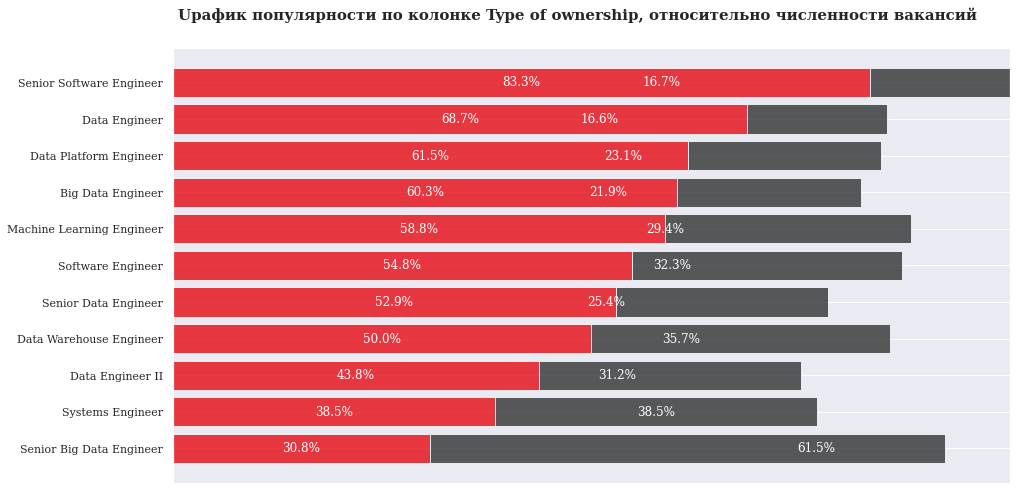

In [82]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Company - Private'], 
        color='#e50914', alpha=0.8, label='Company - Private')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Company - Public'], left=data_q2q3_ratio['Company - Private'], 
        color='#303233', alpha=0.8, label='Company - Public')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Company - Private'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Company - Private'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Company - Public'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Company - Public'][i]+data_q2q3_ratio['Company - Private'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Uрафик популярности по колонке Type of ownership, относительно численности вакансий', fontsize=15, fontweight='bold', fontfamily='serif')   


### Построить график популярности по секторам работы

In [83]:
data = df.groupby(['Sector']).count()["Size"].sort_values(ascending=False)[:10]

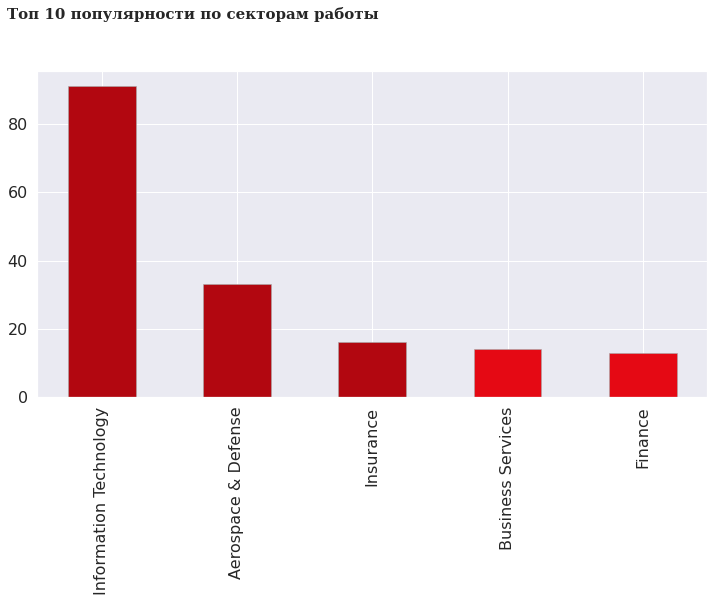

In [85]:
color_map = ['#e50914' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt.tick_params(axis='both', which='major', labelsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)
fig.text(0.09, 1, 'Топ 10 популярности по секторам работы', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

### Построить гистограмму распределения рейтинга компаний

In [63]:
data = df.groupby(by="Company Name").count()["Size"].sort_values(ascending=False)[:10]

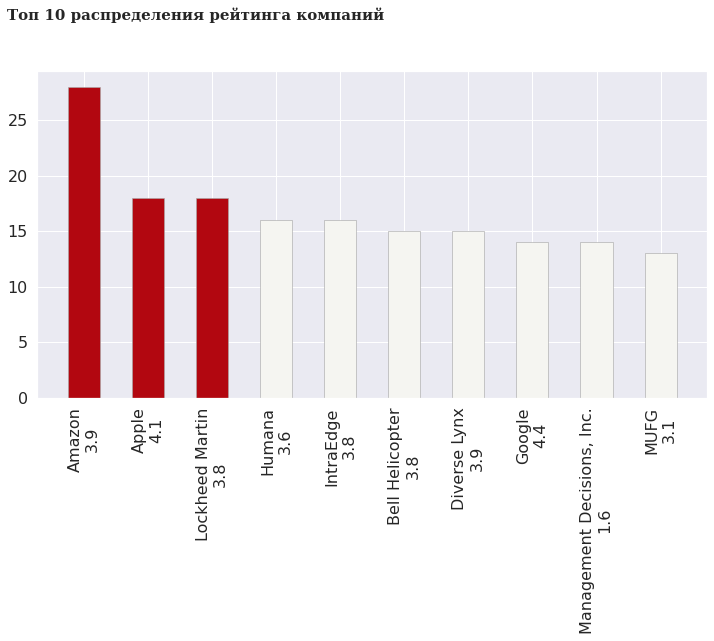

In [64]:
sns.set(style="darkgrid")

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt.tick_params(axis='both', which='major', labelsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)
fig.text(0.09, 1, 'Топ 10 распределения рейтинга компаний', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

### Построить график средних зарплат по популярным компаниям

In [65]:
df = pd.read_csv("de.csv")
popular_company = df.groupby("Company Name").count()["Size"].sort_values(ascending=False)[:10]


In [66]:
company_names =popular_company.index.to_list()

In [67]:
df = df[df["Company Name"].isin(company_names )]

In [68]:
def get_mix_salary(salary_extimate):
    
    sal = salary_extimate.split("-")[0].replace("K", "").replace("$","")
    
    return int(sal)*1000

In [69]:
df["salary"] = df["Salary Estimate"].apply(lambda x:get_mix_salary(x))


In [70]:
avg_salary = df.groupby("Company Name")["salary"].mean().astype(int)

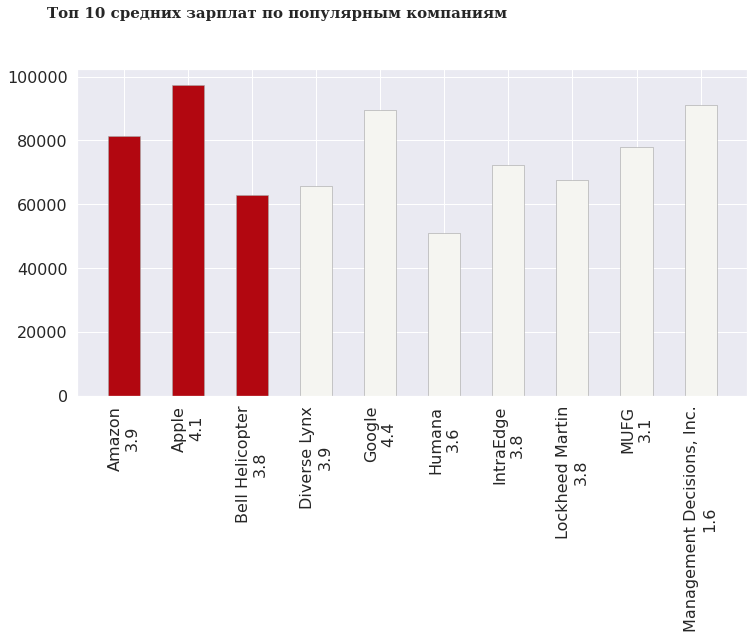

In [71]:
sns.set(style="darkgrid")

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt.tick_params(axis='both', which='major', labelsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.bar(avg_salary.index, avg_salary, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)
fig.text(0.09, 1, 'Топ 10 средних зарплат по популярным компаниям', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

### Построить описаний вакансий облако тегов, исследовать самые популярные слова

In [75]:
import matplotlib.colors as colors

In [77]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [78]:
from wordcloud import WordCloud
import re

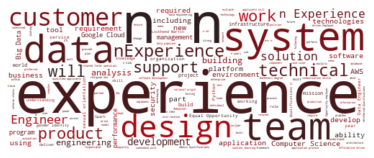

In [ ]:
cmap = colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') 
string_data = re.sub(pattern, '', text) 
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(string_data)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()